![](https://i.imgur.com/e7rgPJ8.gif)
# Introduction 

For kids who grew up in the 1980s and 1990s, sugary cereals flooded the television landscape and many of these commercials shared a common theme of advocating cereal as the "perfect and complete breakfast". Overtime, as more people became health-conscious, fortified cereal turned out to be the new solution to address any health concerns. We knew cereal was the real deal when supermarkets started to dedicate an aisle for it. Walking along these aisles, we observed labels often screaming "25% more iron", "10% more calcium!", "High in Vitamin A, C and E!" and the list goes on.. However, the question to ask is: on what basis does our consumers choose their cereals? Is it based on taste, nutritional values or price?

![](https://ca-times.brightspotcdn.com/dims4/default/9994b62/2147483647/strip/true/crop/1920x1080+0+0/resize/840x473!/quality/90/?url=https%3A%2F%2Fcalifornia-times-brightspot.s3.amazonaws.com%2F93%2F4c%2F5ac56737501911e3e800acc476ce%2Fla-1551745389-xlxxccptd4-snap-image)

In this analysis, we will disclose the main attributes that influence cereal ratings. We will also be predicting ratings using a simple linear regression model. 



## Importing required packages

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
# Importing dataset into colab
# As we are working with colab, we will need to use the following code to import the dataset into this notebook
#from google.colab import files 
#uploaded = files.upload()

## Have an overview of data

In [2]:
def overview():
    data = pd.read_csv("cereal.csv")
    print("The first 5 rows of data are:\n")
    print(data.head)
    print("\n\n\nDataset has {} rows and {} columns".format(data.shape[0], data.shape[1]))
    print("\n\n\nDatatype: \n")
    print(data.dtypes)
    print("\n\n\nThe number of null values for each column are: \n")
    print(data.isnull().sum())
    print("\n\n\nData summary: \n")
    print(data.describe())
    return data
    
data = overview()

The first 5 rows of data are:

<bound method NDFrame.head of                          name mfr type  ...  weight  cups     rating
0                   100% Bran   N    C  ...     1.0  0.33  68.402973
1           100% Natural Bran   Q    C  ...     1.0  1.00  33.983679
2                    All-Bran   K    C  ...     1.0  0.33  59.425505
3   All-Bran with Extra Fiber   K    C  ...     1.0  0.50  93.704912
4              Almond Delight   R    C  ...     1.0  0.75  34.384843
..                        ...  ..  ...  ...     ...   ...        ...
72                    Triples   G    C  ...     1.0  0.75  39.106174
73                       Trix   G    C  ...     1.0  1.00  27.753301
74                 Wheat Chex   R    C  ...     1.0  0.67  49.787445
75                   Wheaties   G    C  ...     1.0  1.00  51.592193
76        Wheaties Honey Gold   G    C  ...     1.0  0.75  36.187559

[77 rows x 16 columns]>



Dataset has 77 rows and 16 columns



Datatype: 

name         object
mfr          

- This is a small dataset, with only 77 rows of data.
- We observed no null values but we do see some weird minimum values for carbo, sugars and potass. I don't think it is possible to see negative values here so I may count the quantity of it and determine if I can remove it or replace it. 

In [3]:
# Count the number of -1 in carbo, sugars and potass column
data[data == -1].count(axis=0)

name        0
mfr         0
type        0
calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       1
sugars      1
potass      2
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64

In [4]:
# Remove affected rows
data = data[(data.carbo >= 0) & (data.sugars >= 0) & (data.potass >= 0)]
data[data == -1].count(axis=0)

name        0
mfr         0
type        0
calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       0
sugars      0
potass      0
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64

## Which manufacturer has the best rating?
- Before we look into ratings, let's first look into the number of manufacturers available for this study.

In [5]:
# Counting number of manufacturers 
data['mfr'].value_counts()

K    23
G    22
P     9
R     7
Q     7
N     5
A     1
Name: mfr, dtype: int64

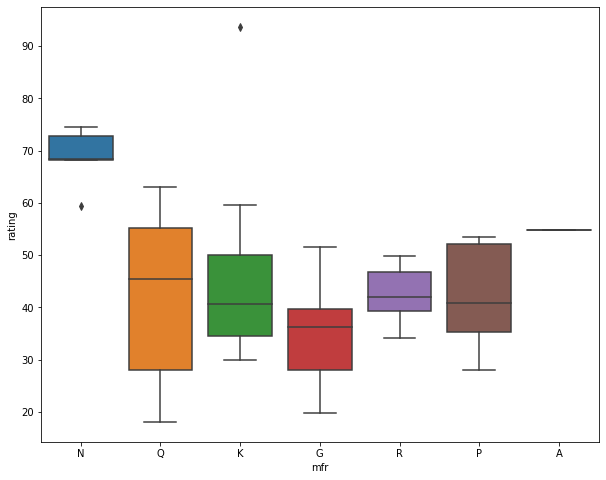

In [6]:
plt.figure(figsize = (10, 8))
sns.boxplot(data = data, x = "mfr", y = "rating")

In [7]:
# Finding out what are the 4 Nabisco cereals that have high ratings
data.loc[data['mfr'] == "N"]

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.00,0.33,68.402973
63,Shredded Wheat,N,C,80,2,0,0,3.0,16.0,0,95,0,1,0.83,1.00,68.235885
64,Shredded Wheat 'n'Bran,N,C,90,3,0,0,4.0,19.0,0,140,0,1,1.00,0.67,74.472949
65,Shredded Wheat spoon size,N,C,90,3,0,0,3.0,20.0,0,120,0,1,1.00,0.67,72.801787
68,Strawberry Fruit Wheats,N,C,90,2,0,15,3.0,15.0,5,90,25,2,1.00,1.00,59.363993


Other than Strawberry Fruit Wheats, the rest of Nabisco's cereal seems to fare very well -- with Shredded Wheat'n'Bran cereal performing the best. I have looked up reviews on Walmart and the average rating of this cereal is 4.8/5. 
![](https://i5.walmartimages.com/asr/f2d36132-d611-45e1-846d-55bc6393136f_1.bfc83e18c7f862a1315e2822c49a5a67.jpeg)

In [8]:
# Lowest rating cereal
data.loc[data['rating'] == min(data.rating)]

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
10,Cap'n'Crunch,Q,C,120,1,2,220,0.0,12.0,12,35,25,2,1.0,0.75,18.042851


![](https://images-na.ssl-images-amazon.com/images/I/91R8gmknbCL.jpg)
Seems like Quaker Oats has produced the worst cereal in the market. Ratings from Amazon shows that this cereal is only popular among children. Chances are those that are involved in this study are not children and hence, the poor ratings.

In [9]:
# Best rating cereal
data.loc[data['rating'] == max(data.rating)]

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.5,93.704912


![](https://images-na.ssl-images-amazon.com/images/I/51c9lNHtPBL._SY445_PIbundle-4,TopRight,0,0_SX298SY445SH20_.jpg)
Seems like people like that additional fiber in their diet...

## Can type of cereal (hot or cold) affect rating?
- Similar to looking into manufacturers, we will also want to look into the count for hot and cold type cereal.

In [10]:
print(data['type'].value_counts())
data.loc[data['type'] == "H"]

C    73
H     1
Name: type, dtype: int64


,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
43,Maypo,A,H,100,4,1,0,0.0,16.0,3,95,25,2,1.0,1.0,54.850917


Seems like we only have 1 hot type cereal. As we dig in further, we see that this cereal is Maypo. This cereal is actually an oatmeal with quinoa and can be prepared using a microwave oven. For me, when I prepare my oatmeals I usually just pour in cold milk and add in some frozen mango or blueberries to enhance the flavour. I hate warm oatmeal!
![](https://4.bp.blogspot.com/-kA2N2_Aepqo/V-1bKBth7ZI/AAAAAAAAGJE/7f5PeMZ78_skQRhjL0e5yqY_kfXbkSZtwCLcB/s1600/IMG_2617.JPG)

Well, since we only have one type of hot cereal, plotting a boxplot will not create useful insights.

## Can macronutrients and calories affect ratings?

Text(0.5, 1.0, 'Carbs')

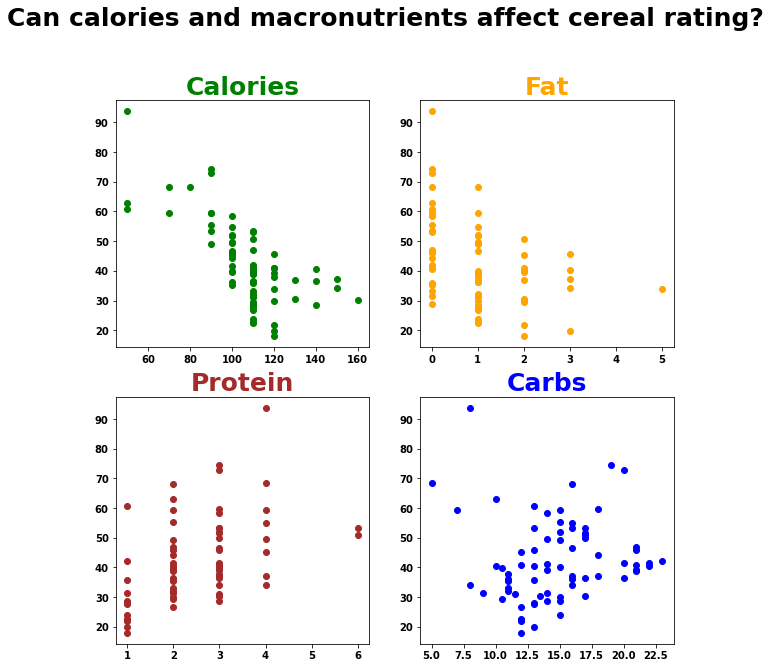

In [17]:
fig = plt.figure()

plt.rcParams['figure.figsize'] = [10,10]
plt.rcParams["font.weight"] = "bold"

fontdict={'fontsize': 25,
          'weight' : 'bold'}

fontdicty={'fontsize': 18,
          'weight' : 'bold',
          'verticalalignment': 'baseline',
          'horizontalalignment': 'center'}

fontdictx={'fontsize': 18,
          'weight' : 'bold',
          'horizontalalignment': 'center'}

plt.subplots_adjust(wspace=0.2, hspace=0.2)

fig.suptitle('Can calories and macronutrients affect cereal rating?', fontsize=25,fontweight="bold", color="black", 
             position=(0.5,1.01))

ax1 = fig.add_subplot(221)
ax1.scatter('calories', 'rating', data= data, c="green")
ax1.set_title('Calories', fontdict=fontdict, color="green")


ax2 = fig.add_subplot(222)
ax2.scatter('fat', 'rating', data=data, c="orange")
ax2.set_title('Fat', fontdict=fontdict, color="orange")


ax3 = fig.add_subplot(223)
ax3.scatter('protein', 'rating', data=data, c="brown")
ax3.set_title('Protein', fontdict=fontdict, color="brown")

ax4 = fig.add_subplot(224)
ax4.scatter('carbo', 'rating', data=data, c="blue")
ax4.set_title("Carbs", fontdict=fontdict, color="blue")

- We can see that as the amount of calories per serving, fats and carbs increase, the rating of the cereal decreases. 
- We also see a positive relationship between protein and ratings.

## Can micronutrients affect ratings?

Text(0.5, 1.0, 'Vitamins')

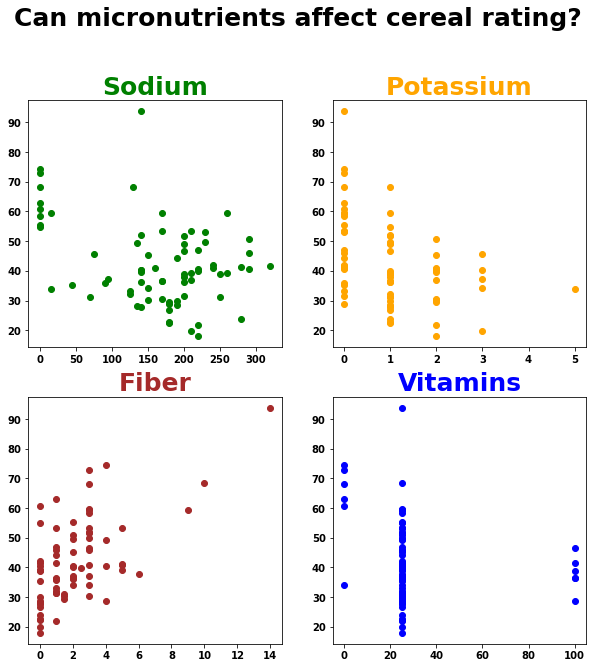

In [12]:
fig = plt.figure()

plt.rcParams['figure.figsize'] = [10,10]
plt.rcParams["font.weight"] = "bold"

fontdict={'fontsize': 25,
          'weight' : 'bold'}

fontdicty={'fontsize': 18,
          'weight' : 'bold',
          'verticalalignment': 'baseline',
          'horizontalalignment': 'center'}

fontdictx={'fontsize': 18,
          'weight' : 'bold',
          'horizontalalignment': 'center'}

plt.subplots_adjust(wspace=0.2, hspace=0.2)

fig.suptitle('Can micronutrients affect cereal rating?', fontsize=25,fontweight="bold", color="black", 
             position=(0.5,1.01))

ax1 = fig.add_subplot(221)
ax1.scatter('sodium', 'rating', data= data, c="green")
ax1.set_title('Sodium', fontdict=fontdict, color="green")


ax2 = fig.add_subplot(222)
ax2.scatter('fat', 'rating', data=data, c="orange")
ax2.set_title('Potassium', fontdict=fontdict, color="orange")


ax3 = fig.add_subplot(223)
ax3.scatter('fiber', 'rating', data=data, c="brown")
ax3.set_title('Fiber', fontdict=fontdict, color="brown")

ax4 = fig.add_subplot(224)
ax4.scatter('vitamins', 'rating', data=data, c="blue")
ax4.set_title("Vitamins", fontdict=fontdict, color="blue")

- For sodium and potassium, we observed a negative relationship whereby ratings decrease as the concentration of sodium and potassium increase. 
- Ratings increase as per gram of dietary fiber increases. 
- Vitamins does not show a clear relationship here.

## Can sugar, display shelf level, weight and cups affect ratings?

Text(0.5, 1.0, 'Cups per serving')

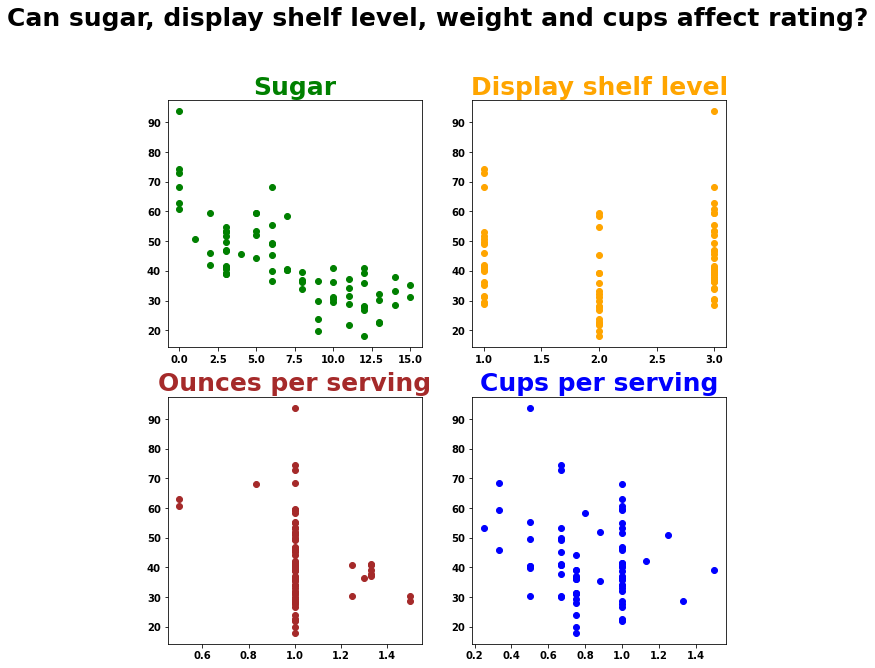

In [13]:
fig = plt.figure()

plt.rcParams['figure.figsize'] = [10,10]
plt.rcParams["font.weight"] = "bold"

fontdict={'fontsize': 25,
          'weight' : 'bold'}

fontdicty={'fontsize': 18,
          'weight' : 'bold',
          'verticalalignment': 'baseline',
          'horizontalalignment': 'center'}

fontdictx={'fontsize': 18,
          'weight' : 'bold',
          'horizontalalignment': 'center'}

plt.subplots_adjust(wspace=0.2, hspace=0.2)

fig.suptitle('Can sugar, display shelf level, weight and cups affect rating?', fontsize=25,fontweight="bold", color="black", 
             position=(0.5,1.01))

ax1 = fig.add_subplot(221)
ax1.scatter('sugars', 'rating', data= data, c="green")
ax1.set_title('Sugar', fontdict=fontdict, color="green")


ax2 = fig.add_subplot(222)
ax2.scatter('shelf', 'rating', data=data, c="orange")
ax2.set_title('Display shelf level', fontdict=fontdict, color="orange")


ax3 = fig.add_subplot(223)
ax3.scatter('weight', 'rating', data=data, c="brown")
ax3.set_title('Ounces per serving', fontdict=fontdict, color="brown")

ax4 = fig.add_subplot(224)
ax4.scatter('cups', 'rating', data=data, c="blue")
ax4.set_title("Cups per serving", fontdict=fontdict, color="blue")

- Ratings decrease as sugar, cups per serving and ounces per serving increases. 
- Cereal at level 1 and 3 tend to fare well. I highly doubt there is a correlation between display level and rating.

## Using linear regression to predict ratings
- Measure correlation first

In [ ]:
# Use label encoder on categorical data
le = LabelEncoder()
 
# Implementing LE on mfr
le.fit(data.mfr.drop_duplicates()) 
data.mfr = le.transform(data.mfr)

# Implementing LE on type
le.fit(data.type.drop_duplicates()) 
data.type = le.transform(data.type)

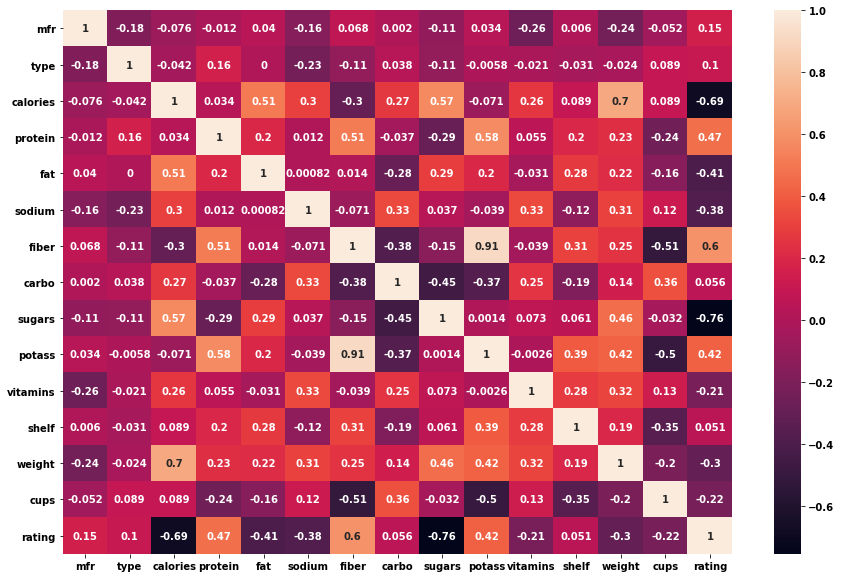

In [15]:
plt.figure(figsize=(15,10))
 
corrMatrix = data.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

- We observed strong positive correlation between potassium and ratings, fiber and ratings and protein and ratings.
- We observed strong negative correlation between calories and ratings, fat and ratings, sodium and ratings and sugars and ratings . 

In [16]:
# Creating training and testing dataset
y = data['rating']
X = data.drop(['rating', 'name'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 42)

lr = LinearRegression().fit(X_train,y_train)
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

print(lr.score(X_test,y_test))

0.9999999999999994


## Summary
- Cereals with high protein and fiber tend to have a higher rating. Both protein and fiber tend to be lowly consumed in a typical diet and supplementing them in cereal will ensure a more balance diet.
- Cereals with high carbohydrate, fats, sugars, sodium and calories tend to have a much lower rating. 